In [19]:
# Imports
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [27]:
# Number of optimizations/versions
num_o = 20

# Create dataframe for all data
data_all = pd.DataFrame()

# Loop over all versions
for version in range(0, num_o):
    
    # Parse data
    directory = "version_{}".format(version)
    path = "./{}/bench/stats.csv".format(directory)
    data = pd.read_csv(path, skipinitialspace = True)
    
    # Add version column
    data["version"] = version
    
    # Select columns
    data = data.loc[:, ["version", "event", "occurrences"]]
    
    # Add current data to all data
    data_all = pd.concat([data_all, data], ignore_index = True)

In [59]:
# Parse data
path = "./baseline/bench/stats.csv"
data = pd.read_csv(path, skipinitialspace = True)

# Add version column
data["version"] = -1

# Select columns
data = data.loc[:, ["version", "event", "occurrences"]]

# Add current data to all data
data_all_baseline = pd.concat([data, data_all], ignore_index = True)

In [60]:
# stats.csv events for reference:
# cycles, instructions, branch-misses, LLC-load-misses, LLC-store-misses, duration_time

def plot_for_event(event, data, postfix):

    # Create lineplot
    g = sns.lineplot(
        x = "version",
        y = "occurrences",
        data=data[data.event == event])

    # Set labels and title
    g.set(
        title=event,
        xlabel="Versions",
        ylabel=event,
        xticks=range(num_o),
        xticklabels=range(num_o)
    )

    plt.savefig("./plots/{}{}".format(event, postfix))

In [76]:
# Calculate the mean duration_time for baseline

# version -1 corresponds to baseline
version = -1

data_mean = data_all_baseline[data_all_baseline.version == version]
data_mean = data_mean[data_mean.event == "duration_time"]
data_mean["occurrences"].mean()


25576897348.2

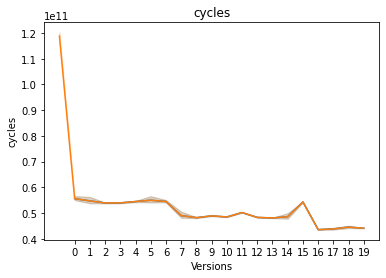

In [45]:
plot_for_event("cycles", data_all, "")
plot_for_event("cycles", data_all_baseline, "_baseline")

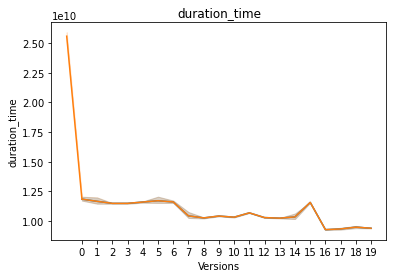

In [46]:
plot_for_event("duration_time", data_all, "")
plot_for_event("duration_time", data_all_baseline, "_baseline")

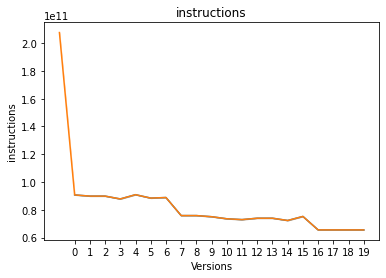

In [47]:
plot_for_event("instructions", data_all, "")
plot_for_event("instructions", data_all_baseline, "_baseline")

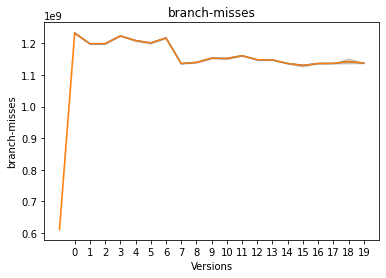

In [48]:
plot_for_event("branch-misses", data_all, "")
plot_for_event("branch-misses", data_all_baseline, "_baseline")

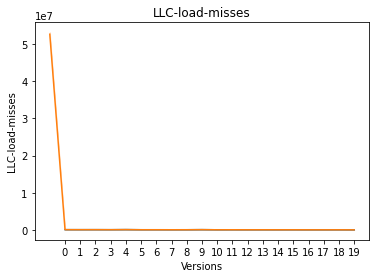

In [49]:
plot_for_event("LLC-load-misses", data_all, "")
plot_for_event("LLC-load-misses", data_all_baseline, "_baseline")

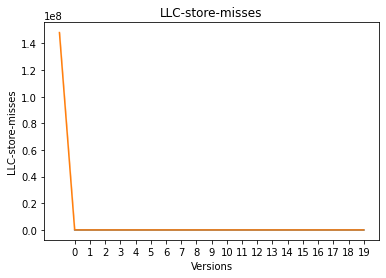

In [50]:
plot_for_event("LLC-store-misses", data_all, "")
plot_for_event("LLC-store-misses", data_all_baseline, "_baseline")